In [51]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import math as mt

from timeit import default_timer as timer


## Taylor Approximation

In [153]:
# Naive Taylor expansion for exp(x)
def exp_taylor_app(n, x):
    ret = 0.
    for nn in range(n + 1):
        ret += 1./mt.factorial(nn) * np.power(x, nn)
    return ret

# More efficient Taylor expansion for exp(x)
def exp_taylor_app_eff(n, x):
    ret = 1. 
    prec = 1.
    for nn in range(1, n + 1):
        prec = prec * 1./nn * x 
        ret += prec
    return ret

# Another Taylor expansion using lambda function 
def exp_taylor_app_lambda(n):
    f = lambda x: sum(1./mt.factorial(nn) * np.power(x, nn) for nn in range(n + 1))
    return f



#### Timing of Taylor expansions

In [154]:
x = np.linspace(-10,10,1000)

n = 10
ntimes = 1000
start = timer()
for i in xrange(ntimes):
    f = np.exp(x)
end = timer()
time1 = end - start
#plt.plot(x, f, "b")


start = timer()
for i in xrange(ntimes):
    f = exp_taylor_app(n, x)
end = timer()
time2 = end - start
#plt.plot(x, f, "g")

start = timer()
for i in xrange(ntimes):
    f = exp_taylor_app_eff(n, x)
end = timer()
time3 = end - start
#plt.plot(x, f, "g")

start = timer()
for i in xrange(ntimes):
    f = exp_taylor_app_lambda(n)(x)
end = timer()
time4 = end - start
#plt.plot(x, f, "r")

#plt.show()


print "t1: %.5f \t t2: %.5f \t t3: %.5f \t t4: %.5f" %(time1, time2, time3, time4)

t1: 0.01575 	 t2: 0.49454 	 t3: 0.12891 	 t4: 0.51392


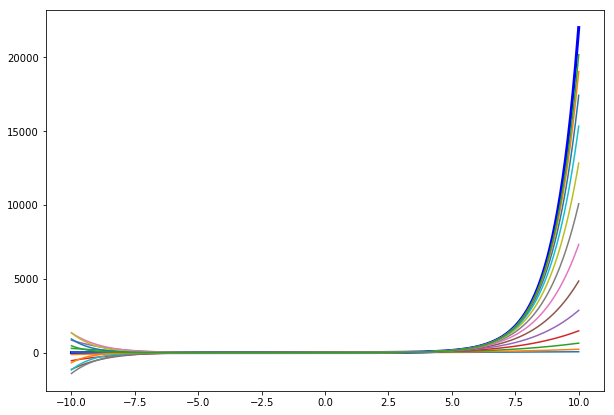

In [155]:
x = np.linspace(-10,10,1000)

plt.figure(figsize=(10,7))
plt.plot(x,np.exp(x), "b", linewidth=3.0)

for n in range(2,15):
    #plt.plot(x, exp_taylor_app(n,x))
    plt.plot(x, exp_taylor_app_eff(n, x))

plt.show()

## Pade Approximation 

In [123]:
def pade_app(p, q, x):
    # Pade approximation for exp(x)
    p_num = sum(mt.factorial(p + q -j)*mt.factorial(p)/float(mt.factorial(p + q)*mt.factorial(p - j)*mt.factorial(j)) * x**j for j in range(p + 1))
    q_den = sum(mt.factorial(p + q -j)*mt.factorial(q)/float(mt.factorial(p + q)*mt.factorial(q - j)*mt.factorial(j)) * (-x)**j for j in range(q + 1))
    return p_num/q_den

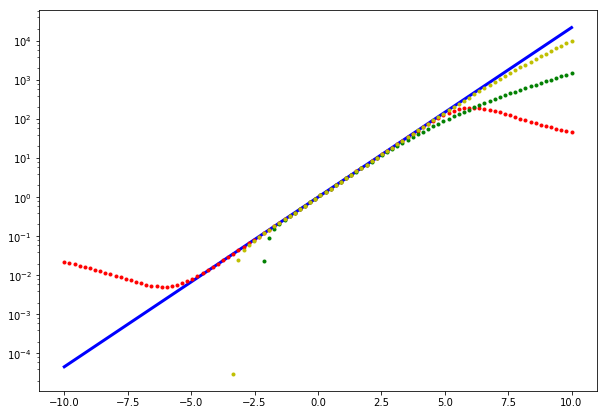

In [133]:
x = np.linspace(-10,10,100)

plt.figure(figsize=(10,7))
plt.plot(x,np.exp(x), "b", linewidth=3.0)

p = 4
q = 4

plt.semilogy(x, pade_app(p, q, x), "o", markersize = 3, color = "r")
plt.semilogy(x, exp_taylor_app_eff(5, x),"o", markersize = 3, color = "g")
plt.semilogy(x, exp_taylor_app_eff(9, x),"o",markersize = 3, color = "y")

plt.show()

## Error Analysis: Taylor vs Pade

In [135]:
def abs_error(list1,list2):
    ret = np.absolute(list1 - list2)
    return ret

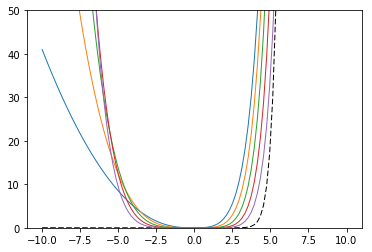

In [148]:
x = np.linspace(-10,10,100)
p = 4
q = 4

plt.plot(x,abs_error(np.exp(x), pade_app(p, q, x)), '--', linewidth=1.0, color = "black")
for n in range(2,7):
    plt.plot(x,abs_error(np.exp(x),exp_taylor_app_eff(n, x)), linewidth=1.0)

plt.ylim([0,50])
plt.show()